In [136]:
# Linear Regression with multiple variables
# price = m * area + b      => Single 
# m1, m2 and m3             => Co-Efficients
# b                         => Intercept
# price = m1 * area + m2 * bedrooms + m3 * age + b

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from joblib import dump

In [ ]:
# Load the data
df = pd.read_csv("data.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20.0,5500000
1,3000,4.0,15.0,5650000
2,3200,NaN,18.0,6100000
3,3600,3.0,30.0,6900000
4,4000,5.0,8.0,7200000
5,2700,3.0,20.0,5510000
6,3010,4.0,15.0,5650300
7,3250,3.0,NaN,6104000
8,3710,3.0,30.0,6800000
9,4370,5.0,8.0,7235000


: 

: 

In [1]:
# Drop Missing values
# df.dropna(inplace=True)

# Fill missing values
# df.fillna(2, inplace=True)
# df

# Fill missing data with medians of column
medianBedrooms = math.floor(df.bedrooms.median())
df.bedrooms = df.bedrooms.fillna(medianBedrooms)
df

NameError: name 'math' is not defined

In [140]:
medianAge = math.floor(df.age.median())
df.age = df.age.fillna(medianAge)
df

,area,bedrooms,age,price
0,2600,3.0,20.0,5500000
1,3000,4.0,15.0,5650000
2,3200,3.0,18.0,6100000
3,3600,3.0,30.0,6900000
4,4000,5.0,8.0,7200000
5,2700,3.0,20.0,5510000
6,3010,4.0,15.0,5650300
7,3250,3.0,18.0,6104000
8,3710,3.0,30.0,6800000
9,4370,5.0,8.0,7235000


In [141]:
# Prepare features and target
X = df[['area', 'bedrooms', 'age']]
y = df['price']

In [142]:
# Fit data to linear regression model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
# Predict prices
df["predicted_price"] = model.predict(X)
df

,area,bedrooms,age,price,predicted_price
0,2600,3.0,20.0,5500000,5.362653e+06
1,3000,4.0,15.0,5650000,5.775314e+06
2,3200,3.0,18.0,6100000,6.092490e+06
3,3600,3.0,30.0,6900000,6.771721e+06
4,4000,5.0,8.0,7200000,6.917812e+06
5,2700,3.0,20.0,5510000,5.489109e+06
6,3010,4.0,15.0,5650300,5.787960e+06
7,3250,3.0,18.0,6104000,6.155718e+06
8,3710,3.0,30.0,6800000,6.910823e+06
9,4370,5.0,8.0,7235000,7.385701e+06


In [144]:
coef_area, coef_rooms, coef_age = model.coef_
incercept = model.intercept_

In [145]:
# Regression Equation
print(f"Price = {coef_area:.2f} * area + {coef_rooms:.2f} * rooms + {coef_age:.2f} * age + {incercept:.2f}")

Price = 1264.56 * area + -20911.64 * rooms + 14450.49 * age + 1848512.24


In [146]:
1440.00 * 2600 + -46000.00 * 3 + 12000.00 * 20 + 1494000.00

5340000.0

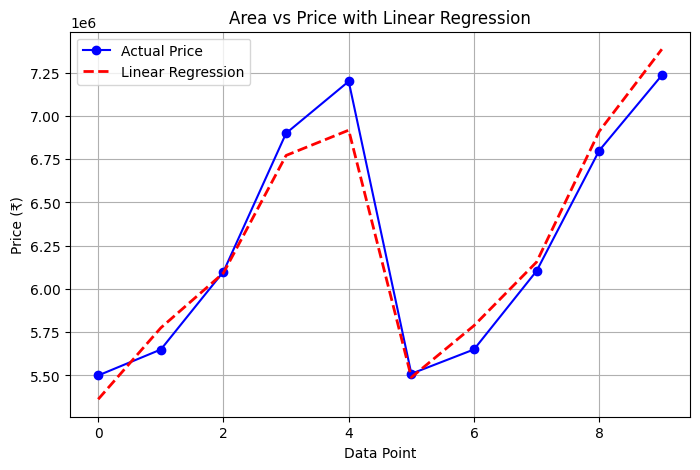

In [147]:
# Plot
# Plot
plt.figure(figsize=(8,5))
plt.plot(df.index, df['price'], 'o-', label='Actual Price', color='blue')
plt.plot(df.index, df['predicted_price'], 'r--', label='Linear Regression', linewidth=2)

# Labels and Legends
plt.title('Area vs Price with Linear Regression')
plt.xlabel('Data Point')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)


In [148]:
# Save our model in a file
dump(model, "model")

['model']